<a href="https://colab.research.google.com/github/fideslynn/data_science_fundamentals/blob/main/InterestvsPrincipalGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interest vs Principal Graph
Submitted by Fides Gastanes - Lynn

We want to produce a graph where a black plot represents the 30 year mortgage at 5% and the blue line represents the 30 year mortgage at 3%. What is graphed is the cumulative interest paid over the course of the loan.

## Importing, mounting and loading the dataset


In [ ]:
# To mount data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To import pandas and pyplot libraries

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# To load dataset
filename = '/content/drive/MyDrive/CODING_DOJO/DATA_SCIENCE_BOOTCAMP/(03) WEEK 3 - Python for Data Visualization/mortgages.csv'
df = pd.read_csv(filename)

In [ ]:
# To check if the dataset loaded properly
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


## Exploring the data

In [ ]:
# To determine possible values and counts

df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

### Filtering the Dataset

#### Mortgage Name Filter

In [ ]:
# To create a filter so the Mortgage Name is '30 Year' 


thirty_years_filter = df['Mortgage Name'] == '30 Year'

# To check how many rows correspond to 30 years

thirty_years = df[thirty_years_filter]
len(thirty_years)


720

#### 3% Interest Rate Data Filter

In [ ]:
# To create a filter for an interest rate of 3%

interest_rate_3_filter = df['Interest Rate'] == 0.03

# To check how many rows correspond to 3% Interest Rate

interest_rate_3 = df[interest_rate_3_filter]
len(interest_rate_3)


540

#### 5% Interest Rate Data Filters

In [ ]:
# To create a filter for an interest rate of 3%

interest_rate_5_filter = df['Interest Rate'] == 0.05

# To check how many rows correspond to 3% Interest Rate

interest_rate_5 = df[interest_rate_5_filter]
len(interest_rate_5)

540

### Creating New Dataframes 

##### 3% Interest Rate Dataframe

In [ ]:
# To define a new dataframe based on both 30-year and 3% Interest Rate filters

IR3_df = pd.DataFrame(df[thirty_years_filter & interest_rate_3_filter])
IR3_df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


##### 5% Interest Rate Dataframe

In [ ]:
# To define a new dataframe based on both 30-year and 5% Interest Rate filters

IR5_df = pd.DataFrame(df[thirty_years_filter & interest_rate_5_filter])
IR5_df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


## Creating the Graph

### Assigning the x and y axes for both lines


In [ ]:
# To make the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid

# For 3% Interest Paid
x_3 = IR3_df['Month']
y_3 = IR3_df.groupby([thirty_years_filter, interest_rate_3_filter])[['Interest Paid']].cumsum()

# For 3% Interest Paid
x_5 = IR5_df['Month']
y_5 = IR5_df.groupby([thirty_years_filter, interest_rate_5_filter])[['Interest Paid']].cumsum()

# To check if the numbers are correct

print('''
3% INTEREST RATE CUMULATIVE SUM: 
''')
print(y_3)

print('''
5% INTEREST RATE CUMULATIVE SUM: 
''')
print(y_5)


3% INTEREST RATE CUMULATIVE SUM: 

     Interest Paid
0          1000.00
1          1998.28
2          2994.84
3          3989.67
4          4982.77
..             ...
355      207064.13
356      207080.87
357      207093.44
358      207101.82
359      207106.01

[360 rows x 1 columns]

5% INTEREST RATE CUMULATIVE SUM: 

     Interest Paid
360        1666.66
361        3331.32
362        4993.97
363        6654.60
364        8313.20
..             ...
715      372928.64
716      372964.02
717      372990.60
718      373008.35
719      373017.23

[360 rows x 1 columns]


### Plotting the graph

The x axis for both lines represent time in months. The y axes represent the cumulative sum for the Interest Paid. The blue line is the cumulative sum for 3% Interest Rate while the black line is for %5 Interest Rate.

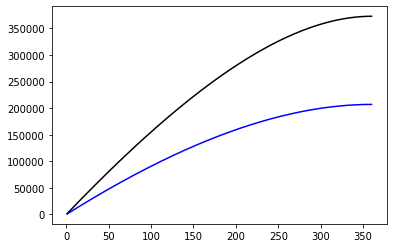

In [ ]:
# Black: c = 'k'
# Blue: c = 'b'

plt.plot(x_5, y_5, c='k')
plt.plot(x_3, y_3, c='b')
plt.show()
